In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
# Matriks tridiagonal
def tridag(a,b,c,u,n,ng):
    temp=b[0]
    u[0]=u[0]/temp
    for j in range(1,n):
        temp1 = b[j]
        b[j]  = c/temp
        temp  = temp1-a*b[j]
        u[j]  = (u[j]-a*u[j-1])/temp
    for j in range (n-2,-1,-1):
        u[j]  = u[j]-b[j+1]*u[j+1]
    return u

# rumus filter untuk potensial 1 dimensi
def filter1D(dx,vpot,psi,energy,n,k):
    dx2 = dx*dx
    a = -0.5/dx2
    c = a
    odx2 = 1/dx2
    b=np.zeros(n)
    #k adalah jumlah perulangan filter
    for k in range(0,5):
        for i in range(0,n):
            b[i] = (odx2+vpot[i]-energy)
        global tridag
        psi = tridag(a,b,c,psi,n,n)
    fnorm = sum(psi*psi)*dx
    psi = psi / (fnorm**0.5)
    return psi

# rumusan hamiltonian
def hamiltonian(dx,vpot,psi,ng):
    dx2 = dx*dx
    a =-0.5/dx2
    c = a
    odx = 1/dx2
    u = np.zeros(ng)
    u[0] =((odx+vpot[0])*psi[0] + c*psi[1])
    for i in range (1,ng-1):
        u[i] = (a*psi[i-1]+(odx+vpot[i])*psi[i]+c*psi[i+1])
    u[-1]=((a*psi[-2])+(odx+vpot[-1])*psi[-1])
    psiu = psi*u
    energy_new = sum(psiu)*dx
    return energy_new

# Rumusan eigenstate
def eigenState(x, ngrid, vpot, initE, dx):
    if initE <= 0 :
        initE = initE + 1e-12
    x_tart = x[0]
    x_end = x[ngrid - 1]
    psi = np.zeros(ngrid)
    if x_tart < 0:
        for i in range(0,ngrid):
            psi[i] = (np.sin(x[i]) + np.cos(x[i]))
    else:
        for i in range(0,ngrid):
           psi[i] = 1 + x[i] / x_end
    #psi=np.linspace(1,1,ngrid) + x/x[-1]
    energy = initE
    error = 1e3
    loop = 1
    while error>1e-10:
        nloop = 10
        if loop ==1:
            nloop = 10 #nloop
        global filter1D
        global hamiltonian
        psi = filter1D(dx,vpot,psi,energy,ngrid,nloop)
        energy_new =  hamiltonian(dx,vpot,psi,ngrid)
        error = abs(energy_new-energy)#/energy
        energy = energy_new
        loop = loop+1
    output = [energy_new,psi]
    return output

<function matplotlib.pyplot.show(close=None, block=None)>

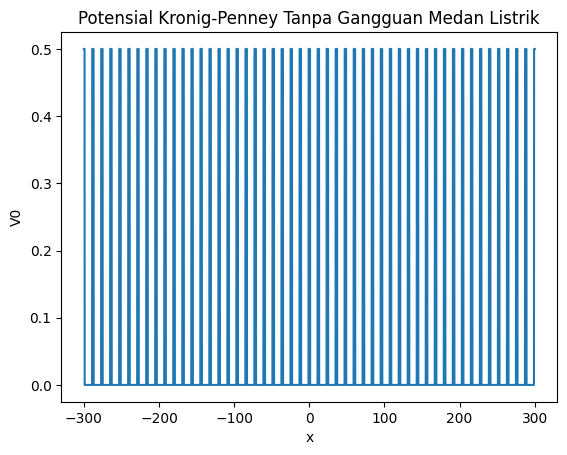

In [ ]:
#set sumur potensial, b=2
xmin = -300
xmax = 300
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 0.5
a = 10
L = a+2
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v1 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L
  if ss < (L/2 - a/2) or ss > (L/2 + a/2):
    v1[i]=V
  else:
    v1[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v1)
#plt.xlim([95,105])
plt.title('Potensial Kronig-Penney Tanpa Gangguan Medan Listrik')
plt.xlabel('x')
plt.ylabel('V0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

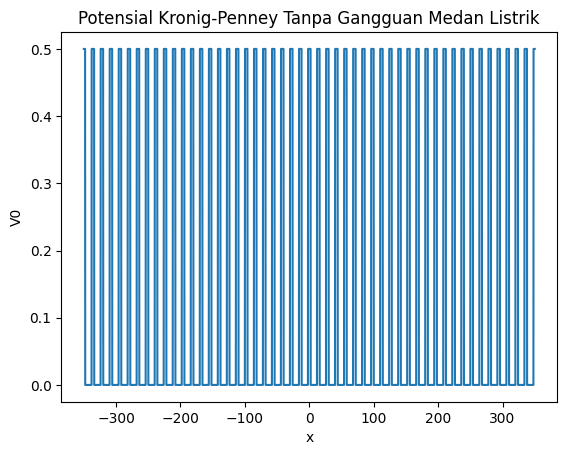

In [ ]:
#set sumur potensial, b=4
xmin = -350
xmax = 350
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 0.5
a = 10
L = a+4
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v2 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L
  if ss < (L/2 - a/2) or ss > (L/2 + a/2):
    v2[i]=V
  else:
    v2[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v2)
#plt.xlim([95,105])
plt.title('Potensial Kronig-Penney Tanpa Gangguan Medan Listrik')
plt.xlabel('x')
plt.ylabel('V0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

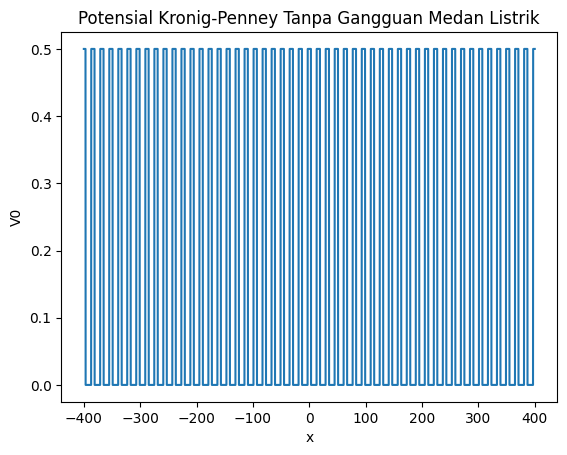

In [ ]:
#set sumur potensial, b=6
xmin = -400
xmax = 400
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 0.5
a = 10
L = a+6
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v3 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L
  if ss < (L/2 - a/2) or ss > (L/2 + a/2):
    v3[i]=V
  else:
    v3[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v3)
#plt.xlim([95,105])
plt.title('Potensial Kronig-Penney Tanpa Gangguan Medan Listrik')
plt.xlabel('x')
plt.ylabel('V0')
plt.show

In [ ]:
step = 2000

In [ ]:
Einit1 = np.linspace(0,2,step)
En1 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v1, Einit1[i], dx)
  En1[i] = E

In [ ]:
En1

array([0.02168858, 0.02168858, 0.02168858, ..., 1.99369546, 1.99369546,
       1.99369546])

In [ ]:
sorted_arr = np.sort(En1)

print(sorted_arr[:1000])

In [ ]:
Einit2 = np.linspace(0,2,step)
En2 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v2, Einit2[i], dx)
  En2[i] = E

In [ ]:
Einit3 = np.linspace(0,2,step)
En3 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v3, Einit3[i], dx)
  En3[i] = E

In [ ]:
X1 = np.zeros([2000])
X2 = np.zeros([2000])
X3 = np.zeros([2000])
for i in range(2000):
  X1[i] = 2
  X2[i] = 4
  X3[i] = 6


In [ ]:
#plt.scatter(X4, ener_new_arr_adua, s=1, color='red', label='a=5')
#plt.ylim(0, 0.5)
#plt.ylim(-1,2)

<Figure size 1500x1000 with 0 Axes>

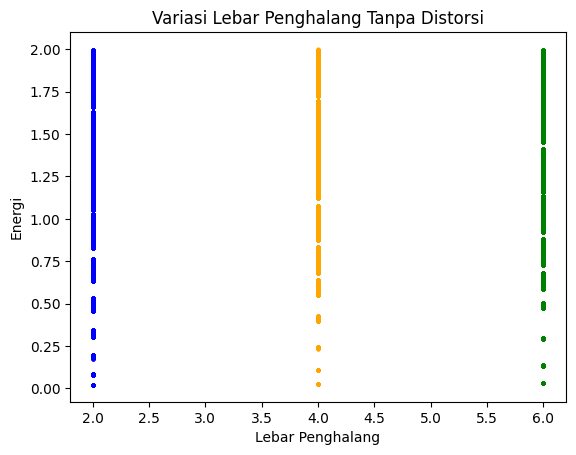

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.scatter(X1, En1, s=4, color='blue', label='b=1')
plt.scatter(X2, En2, s=4, color='orange', label='b=8')
plt.scatter(X3, En3, s=4, color='green', label='b=15')
plt.title('Variasi Lebar Penghalang Tanpa Distorsi')
plt.xlabel('Lebar Penghalang')
plt.ylabel('Energi')

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

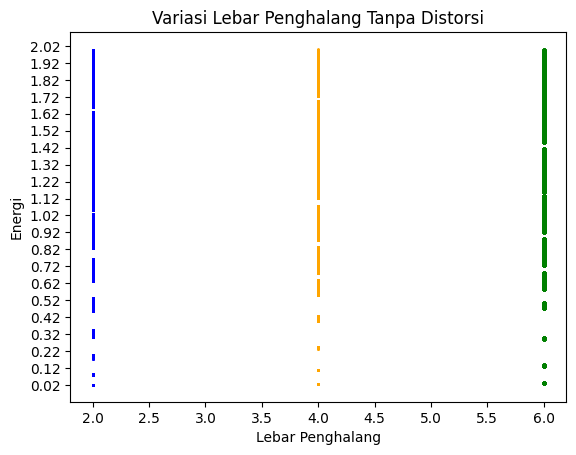

<Figure size 1500x1000 with 0 Axes>

In [ ]:

plt.scatter(X1, En1, s=1, color='blue', label='a=0,5')
plt.scatter(X2, En2, s=1, color='orange', label='a=1')
plt.scatter(X3, En3, s=4, color='green', label='a=2')
#plt.scatter(X4, ener_new_arr_adua, s=1, color='red', label='a=5')
#plt.ylim(0, 0.5)
#plt.ylim(-1,2)
plt.yticks(np.arange(min(En1), max(En1)+0.1, 0.1))
plt.title('Variasi Lebar Penghalang Tanpa Distorsi')
plt.xlabel('Lebar Penghalang')
plt.ylabel('Energi')
plt.figure(figsize=(15, 10))


In [ ]:
En1

array([0.02168858, 0.02168858, 0.02168858, ..., 1.99369546, 1.99369546,
       1.99369546])

In [ ]:
sorted_arr = np.sort(En1)

print(sorted_arr[:1000])

[0.02004821 0.02099848 0.02118514 0.02160065 0.02163146 0.02163146
 0.02163146 0.02163731 0.02163731 0.02163731 0.02163731 0.02168858
 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858
 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858
 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858
 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858 0.02168858
 0.02168858 0.02168858 0.02174126 0.02174126 0.02174126 0.02174126
 0.02178139 0.02178139 0.02178139 0.02180623 0.07945447 0.07945447
 0.07945447 0.07961073 0.07961073 0.07961073 0.07961073 0.07961073
 0.07961073 0.07961073 0.07961073 0.07961073 0.07961073 0.07961073
 0.07961073 0.07961073 0.07986405 0.07986406 0.07986406 0.07986406
 0.07986406 0.07986406 0.07986406 0.07986406 0.07986406 0.07986406
 0.07986406 0.07986406 0.07986406 0.07986406 0.07986406 0.07986406
 0.07986406 0.07986406 0.07986406 0.08049926 0.08049926 0.08049926
 0.08049926 0.08049926 0.08049926 0.08049926 0.08049926 0.0804

In [ ]:
sorted_arr = np.sort(En2)

print(sorted_arr[:1000])

In [ ]:
sorted_arr = np.sort(En3)

print(sorted_arr[:1000])